In [1]:
from selenium import webdriver 
import time as TIME
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

In [16]:
option = webdriver.ChromeOptions()

option.add_argument("— incognito")

executable_path = "/Users/qcf-35/Documents/Selenium/chromedriver"

browser = webdriver.Chrome(executable_path = executable_path, 
                            chrome_options=option)

browser.get("http://phaisinhprice.bsc.com.vn/")


TIME.sleep(5)




   Date:       Time:     VN30:   Price : Volume: CumVolume  Spread
06/07/2018   10:14:05   877.16   863.90     1 42,490      13.26 



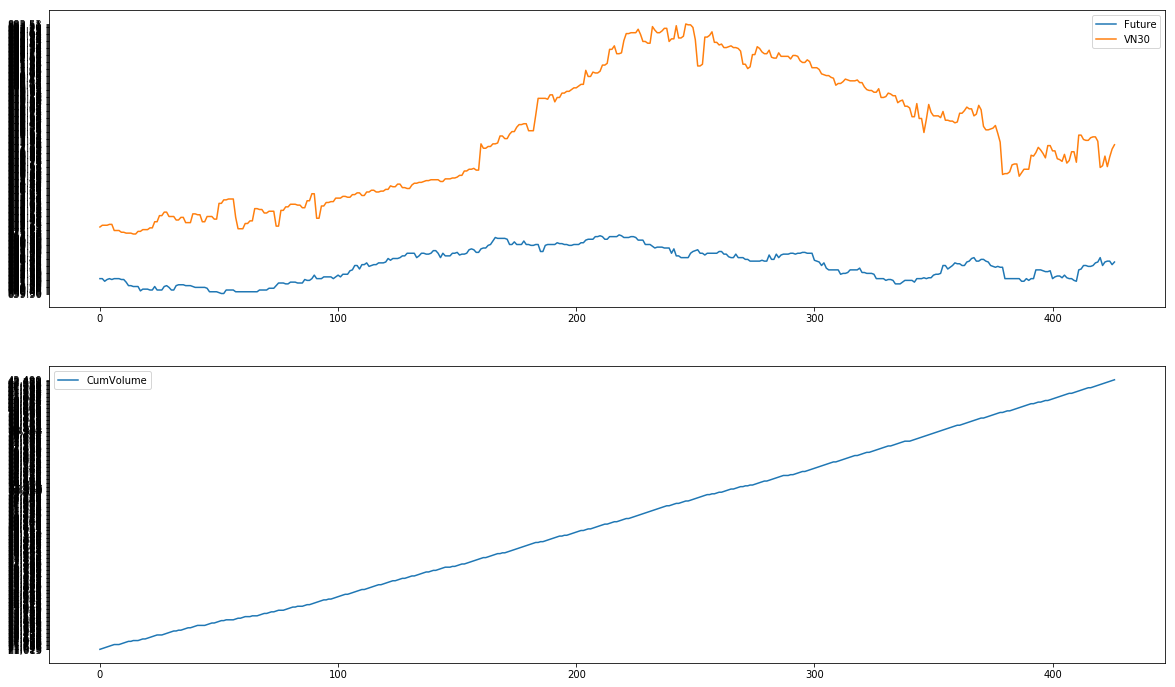

KeyboardInterrupt: 

In [17]:
columns = ["Date","Time","VN30", "Price","Volume","CumVol","Spread"]
df = pd.DataFrame(columns = columns)


i = 0
while True:
    
    TIME.sleep(1)
    
    date_element = browser.find_elements_by_xpath("//*[@id='header_datetime']")
    dates = [x.text for x in date_element]

    time_element = browser.find_elements_by_xpath("//*[@id='exctime']")
    times = [x.text for x in time_element]

    price_element = browser.find_elements_by_xpath("//*[@id='VN30F1807closePrice']")
    prices = [x.text for x in price_element]
 
    vol_element = browser.find_elements_by_xpath("//*[@id='VN30F1807closeVolume']")
    vols = [x.text for x in vol_element]
    
    VN30_element = browser.find_elements_by_xpath("//*[@id='divVnIndex_30']")
    VN30s  =  [x.text for x in VN30_element]
    
    cumvols_element = browser.find_elements_by_xpath("//*[@id='VN30F1807totalTrading']")
    cumvols  =  [x.text for x in cumvols_element]
     
        

    for date, time, VN30, price, vol, cumvol in zip(dates, times, VN30s, prices, vols, cumvols):
        spread = str(round((float(VN30) - float(price)),2))
        print("   Date:       Time:     VN30:   Price : Volume: CumVolume  Spread")
        print(date + "   " + time + "   " + VN30 + "   " + price + "     " + vol+"     " +cumvol+ "      "+ spread, '\n')
    
    
    
    df.loc[i] = [date, time, VN30, price, vol, cumvol, spread]
    
    period = len(df['Price'])
    plt.figure(figsize =(20,12))
    plt.subplot(211)
    plt.plot(range(period),df['Price'], label="Future")
    plt.plot(range(period),df['VN30'], label="VN30")
    plt.legend()
#     plt.subplot(212)
#     plt.plot(range(period),df['Spread'], label="Spread")
    plt.subplot(212)
    plt.plot(range(period),df['CumVol'], label="CumVolume")
    plt.legend()
    #plt.scatter(i,df['VN30'][i])
    #plt.scatter(i,df['VN30'][i])
    plt.pause(1)
    #plt.clf()
    
    i+= 1
    
    if time[:5] == '11:30':
        TIME.sleep(5400)
    
    if time[:5] == '14:45':
        break
    clear_output(wait=True)

In [ ]:
date = date.replace("/","-")
save_path = "/Users/qcf-35/Documents/Selenium/stock_data_" + date + ".csv"
df.to_csv(save_path,index = False)